![Winsconsin](img/winsconsin.jpeg)

🩻 **Classification de tumeurs à partir de données médicales**

**Contexte** :
Vous intégrez une équipe de développement en intelligence artificielle dans le cadre d’un projet pilote mené par un consortium de recherche médicale basé dans l’État du Wisconsin, aux États-Unis. Ce projet vise à concevoir des outils numériques d’aide au diagnostic précoce du cancer du sein, en collaboration avec des centres hospitaliers universitaires et des laboratoires d’analyses.

Dans ce cadre, un jeu de données clinique réel — le **Breast Cancer Wisconsin Diagnostic Dataset**, collecté par le Dr. William H. Wolberg au sein de l’université du Wisconsin — a été mis à disposition. Ce dataset contient les caractéristiques de cellules prélevées lors de biopsies mammaires, classées manuellement comme tumeurs bénignes ou malignes.

⸻

🎯 **Objectif** :

Votre mission consiste à concevoir un prototype fonctionnel permettant de prédire la nature de la tumeur à partir de ces données, via un modèle de classification en apprentissage supervisé ([**régression logistique**](https://www.w3schools.com/python/python_ml_logistic_regression.asp)). L’objectif est de démontrer la faisabilité d’un outil automatisé pouvant compléter l’expertise des médecins dans l’analyse de résultats de biopsies.

Construire un modèle de régression logistique capable de prédire la variable `diagnosis` à partir des caractéristiques disponibles dans le fichier ([`data/breast_cancer_wisconsin.csv`](data/breast_cancer_wisconsin.csv)).  

Pour comprendre le dataset, vous pouvez consulter cette page kaggle : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

- Exploration des données (EDA) :
    - Comprendre les variables (qualitatives/quantitatives)
	- Statistiques descriptives
	- Visualisations (histogrammes, heatmap de corrélation, etc.)
- Préparation des données :
    - Traitement des valeurs manquantes sinécessaire
	- **Transformation des variables catégorielles** (`diagnosis`)
	- **Création éventuelle de nouvelles features**
	- Standardisation si nécessaire
    - Séparation train/test
- Modélisation :
    - Implémentation d’un modèle de régression logistique
- Évaluation du modèle :
    - Calcul des métriques : accuracy, precision, recall, f1-score
    - Matrice de confusion 
    - Bonus : [Étudier AUC - ROC curve](https://www.w3schools.com/python/python_ml_auc_roc.asp)
- Intégration simple du modèle dans un script interactif
    - Intégrer votre modèle dans un script Python simple qui permet à un utilisateur de faire une prédiction à partir de nouvelles données.

⚠️ Attention aux variables fortement corrélées

Le jeu de données Breast Cancer Wisconsin contient plusieurs variables fortement corrélées entre elles, notamment :
- `radius_mean`, `perimeter_mean`, `area_mean`
- ainsi que leurs déclinaisons en `_se` et `_worst`

Cela peut poser des problèmes de multicolinéarité, particulièrement si vous utilisez des modèles linéaires (régression logistique, SVM linéaire, etc.). Ces redondances peuvent fausser les résultats ou générer un sur-apprentissage.

➤ Recommandations :
- Identifiez les corrélations fortes à l’aide d’une matrice de corrélation ou d’une heatmap
- En cas de corrélation > 0.9 entre deux variables, conservez une seule variable du groupe
- Bonus (niveau légende 😈) : vous pouvez également étudier et appliquer une [réduction de dimension type PCA (Pricipal Component Analysis)](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-de-donnees-exploratoire/5280368-comprenez-lenjeu-de-lanalyse-en-composantes-principales) si vous souhaitez automatiser le traitement de la redondance

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
import joblib

In [34]:
df = pd.read_csv('data/breast_cancer_wisconsin.csv')

In [35]:
df.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


## on observe que la dataset et composé de 569 lignes et les colonnes ne présente pas de valeur null
### le dataset est composé de 31 colonnes. il faut analyser celle qui sont pertinante, celle qui présente des données contre productif et adapter la solution en fonction de chacun des cas

In [ ]:
%%sql


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## la première lecture de describe

### suppression de la colonne de l'id qui n'est pas pertinant pour notre annalyse

In [37]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
df = df.drop(["id"], axis=1)

In [39]:
df.head(15)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


### Traitement des valeurs à zéro
### on transforme en valeur NaN afin de pouvoir ensuite prendre la médian et insérer celle-çi
##### attention il ne faut pas prendre en compte diagnosis car cette colonne est de type objet. elle renvoie donc O ou 1 pour M & B

In [40]:
# Sélectionner les colonnes où le minimum est 0
colonnes_min_zero = [col for col in df.columns if df[col].min() == 0]

# Afficher la liste des colonnes
print(colonnes_min_zero)

['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']


##### on constate que le % de detection avec des valeur maligne ou benigne sont différents

In [41]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [42]:
cols_with_zero_invalid = ["concavity_mean", "concave points_mean", "concavity_se", "concave points_se", "concavity_worst", "concave points_worst"]
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

for col in cols_with_zero_invalid:
    df[col] = df[col].fillna(df[col].median())

In [43]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.090282,0.049715,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.277475,0.116930,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.078649,0.038142,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.204545,0.063392,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.031360,0.021070,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.124200,0.066960,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.064905,0.034840,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.231400,0.101700,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [44]:
# Sélectionner les colonnes où le minimum est 0
colonnes_min_zero = [col for col in df.columns if df[col].min() == 0]

# Afficher la liste des colonnes
print(colonnes_min_zero)

[]


##### indication si tumeur maligne ou bégnine
##### il faut équilibrer les classes afin d'obtenir des résultats qui ne sont pas influencer par une valeur supérrieur à l'autre

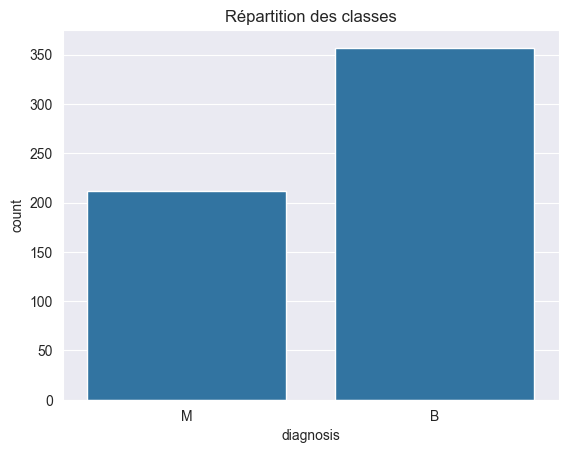

In [45]:
sns.countplot(x=df["diagnosis"], data=df)
plt.title("Répartition des classes")
plt.grid(True, axis="y")
plt.show()

In [46]:
df.shape

(569, 31)

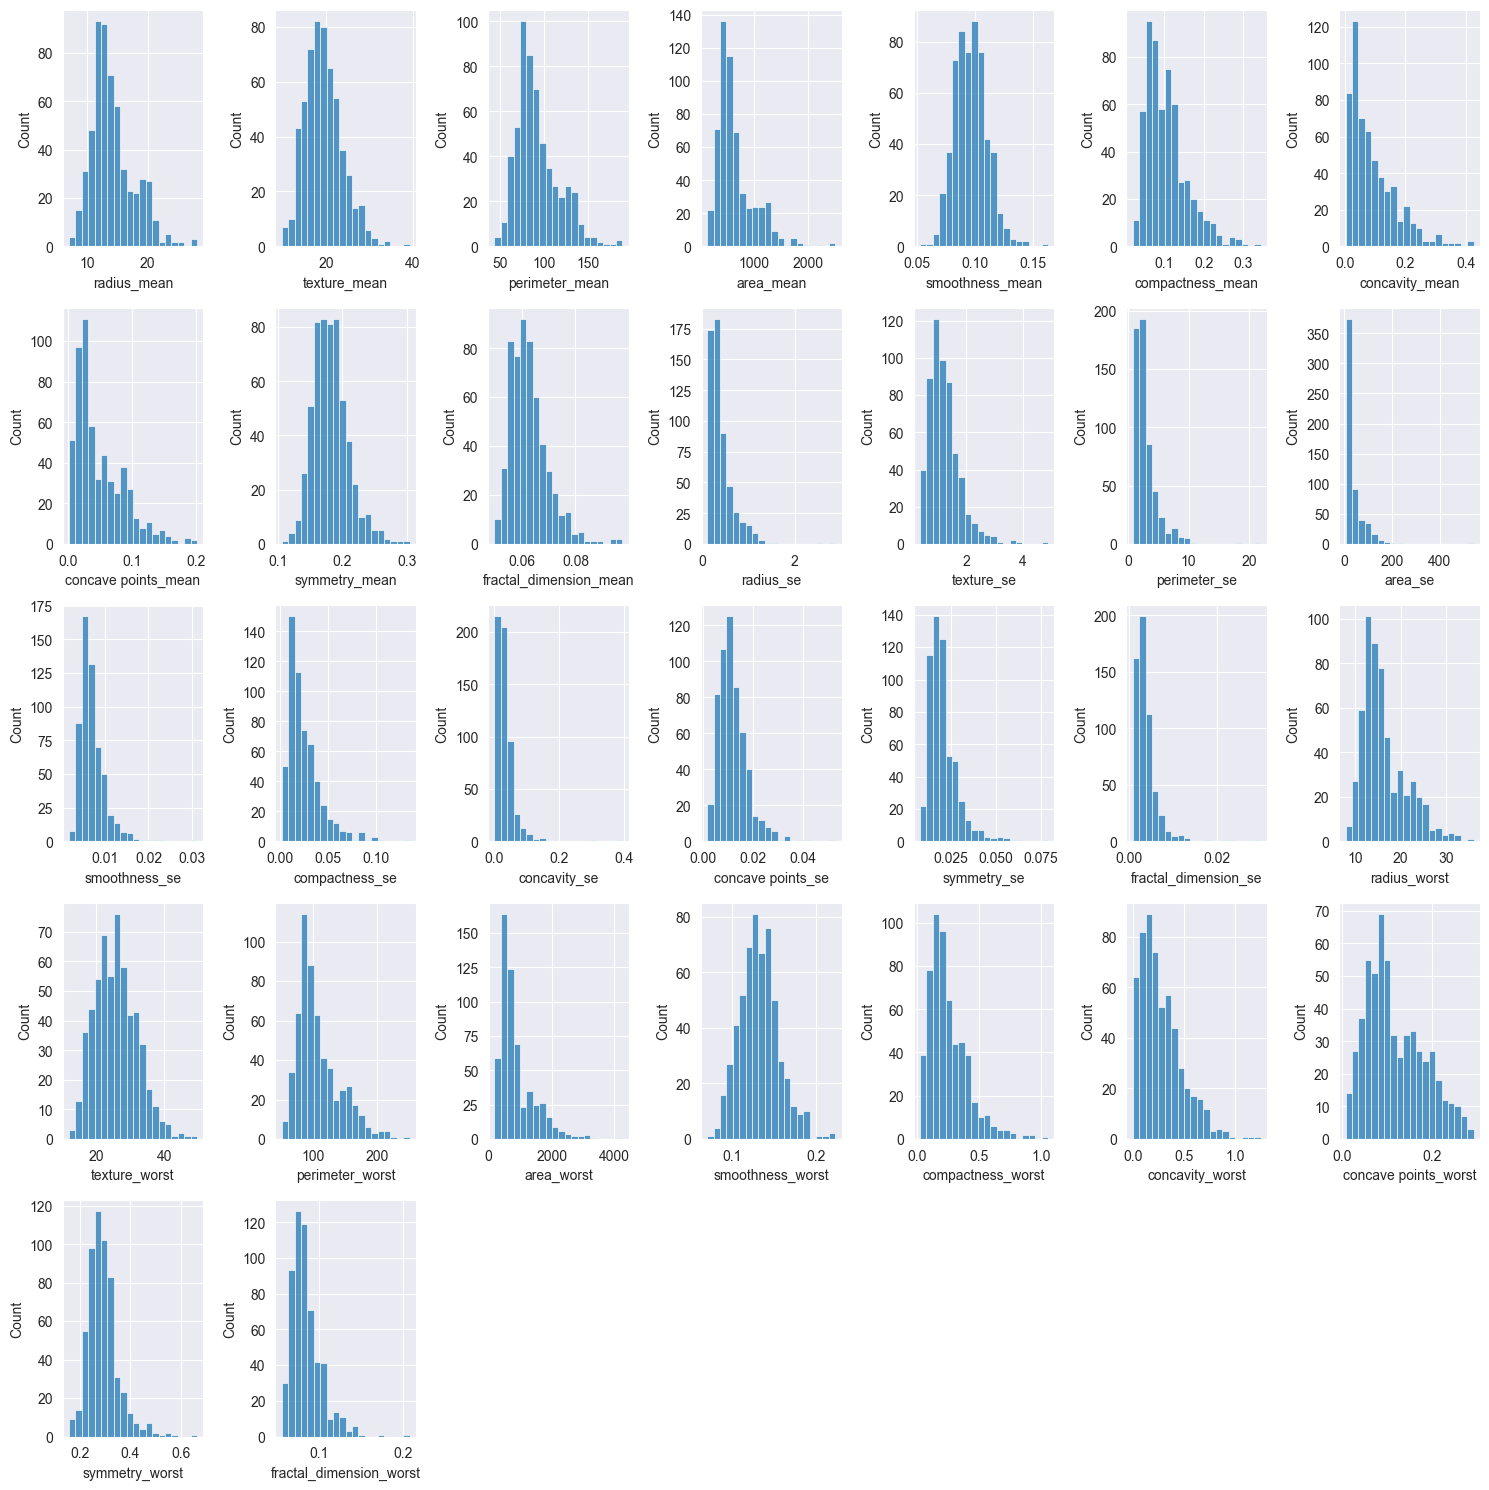

In [47]:
cols = df.columns.drop("diagnosis")

plt.figure(figsize=(15,15))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 7, i)
    sns.histplot(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## La mise en évidence pour des cas de tumeur maligne
#### les graphiques qui une prédominance pour mettre en évidence les risque de tumeur sont :
##### radius_mean, texture_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean, radius_se, perimeter_se, area_se, concave points_se, radius_worst, texture_worst, perimeter_worst, area_worst, smooothness_worst, compactness_worst, concavity_worst, concave points_worst, simmetry_worst, fractial_dimension_worst

#####

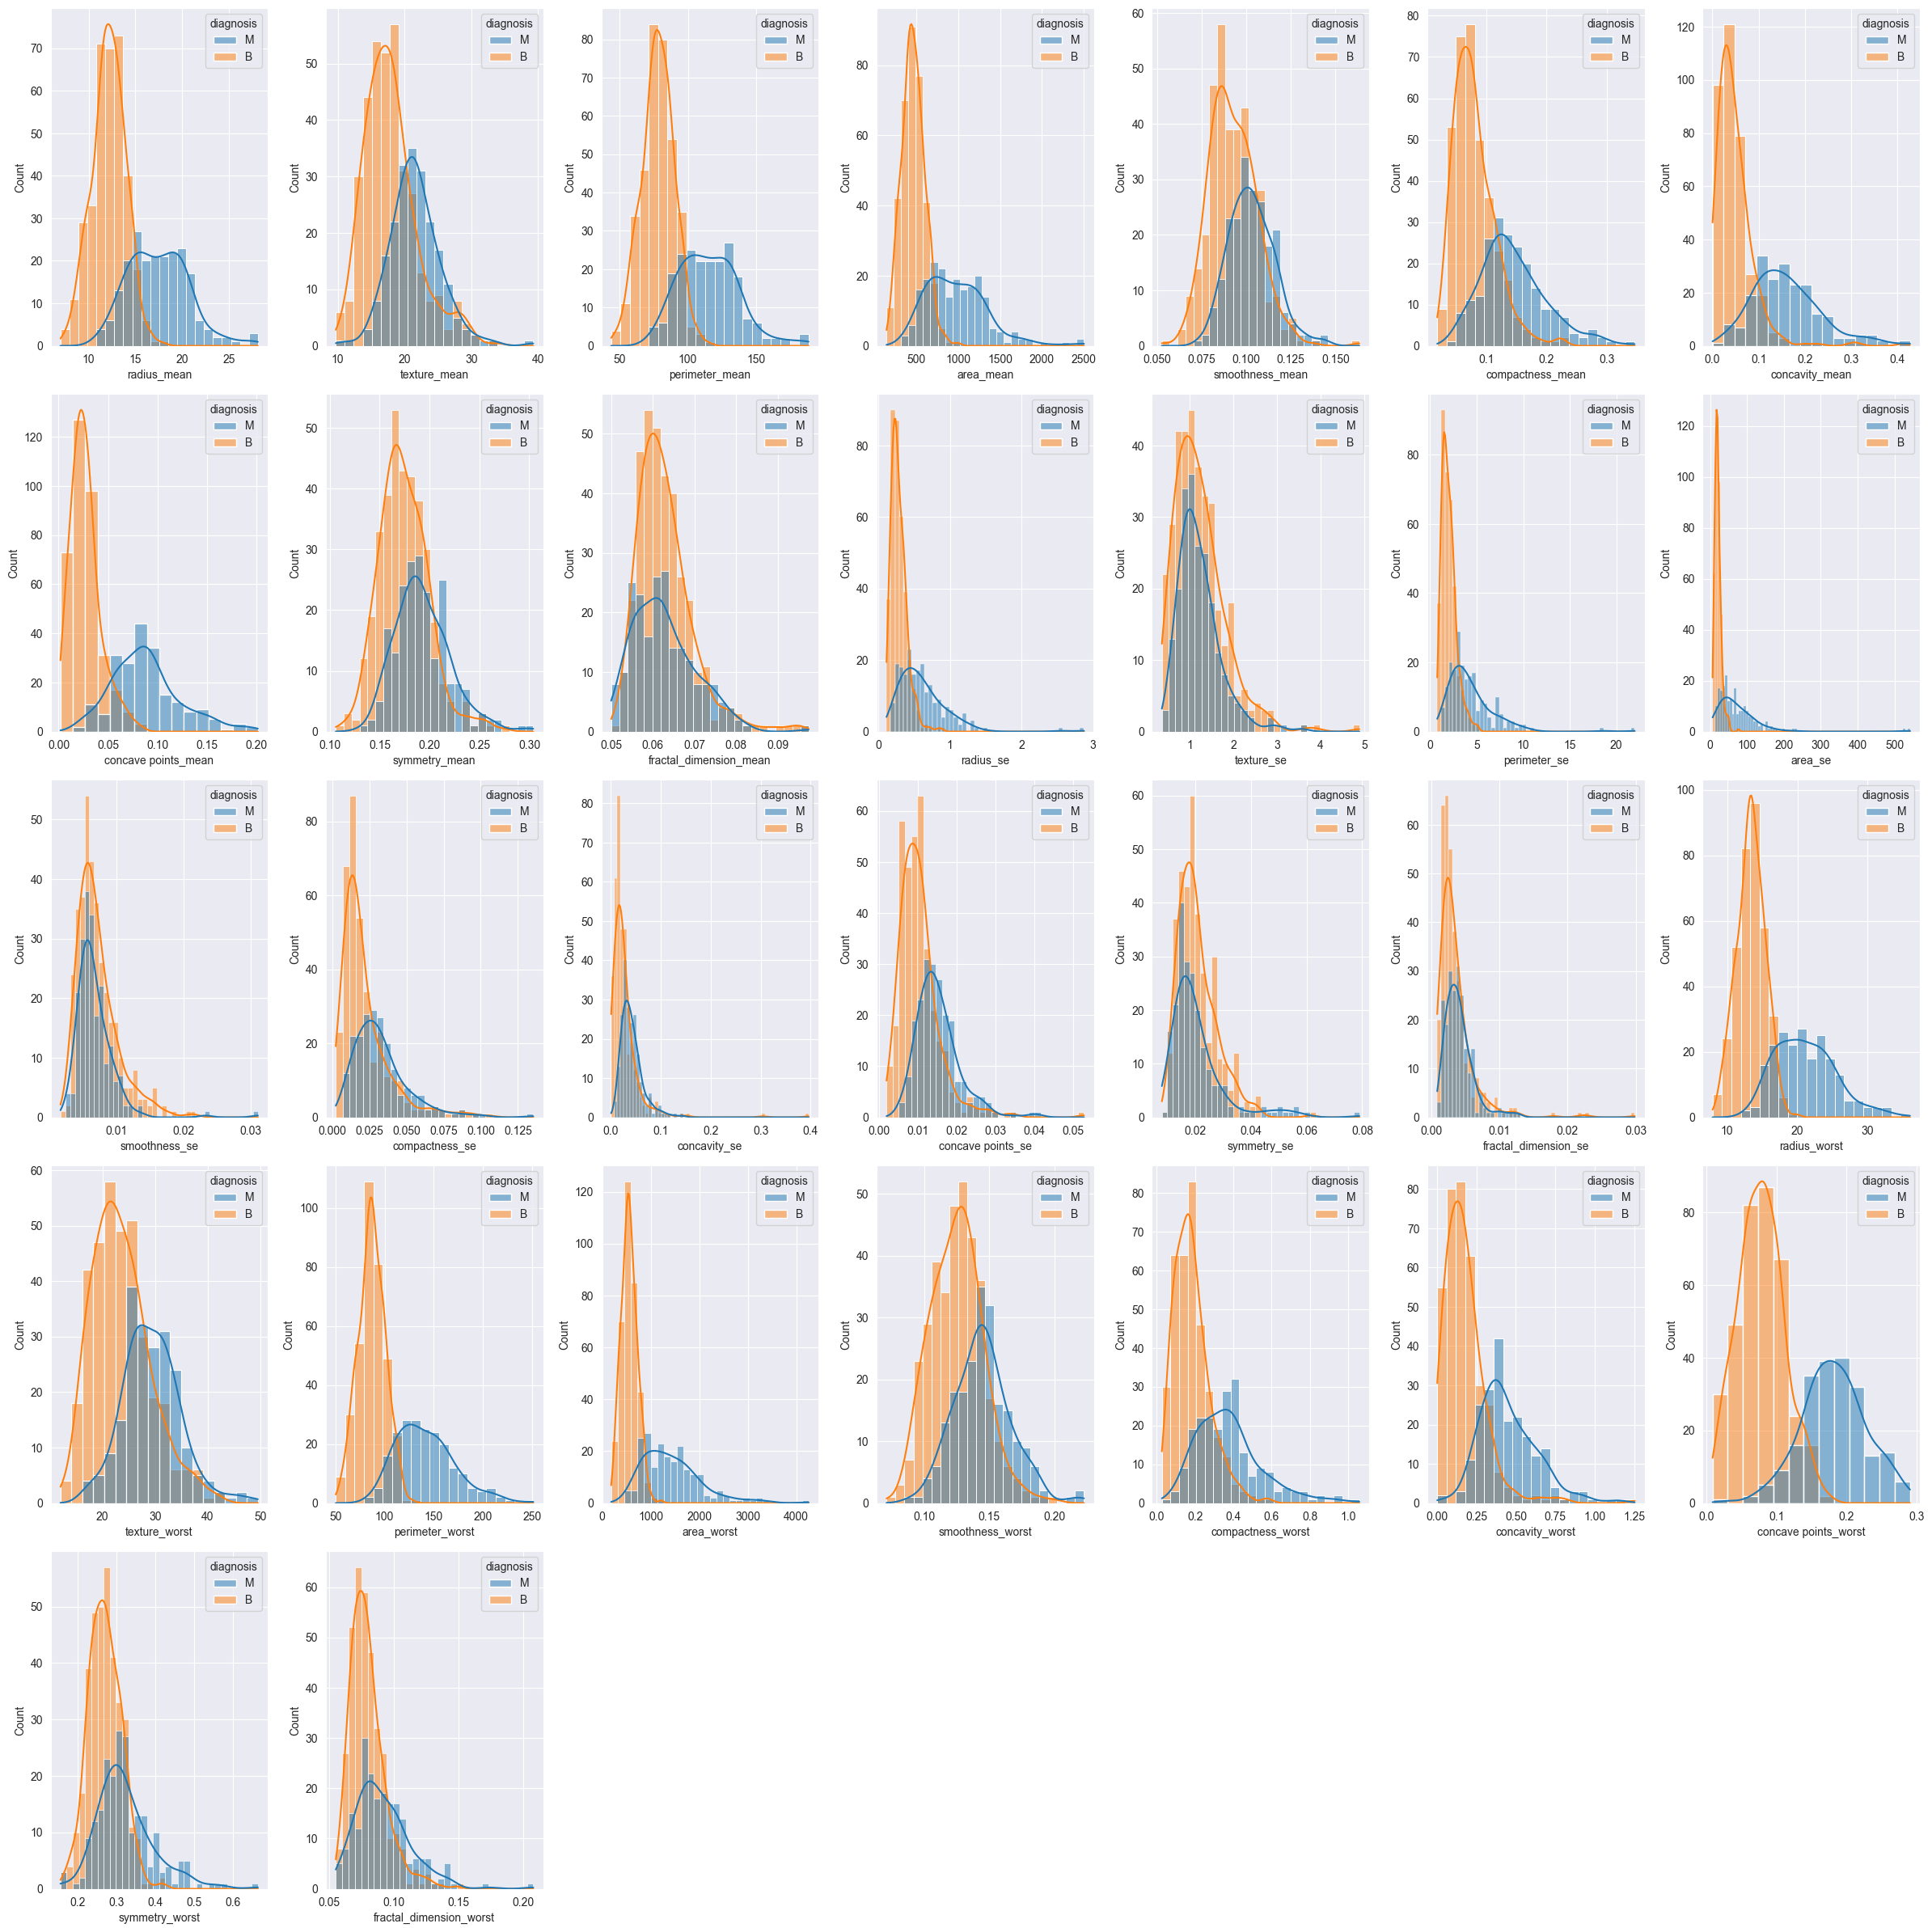

In [48]:
cols = df.columns.drop("diagnosis")

plt.figure(figsize=(24,24))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 7, i)
    sns.histplot(data=df, x=col, hue="diagnosis", kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

##### on peux constater que des valeur abérante sont présente. Ils faut donc les traiter pour avoir un meilleur jeu de test

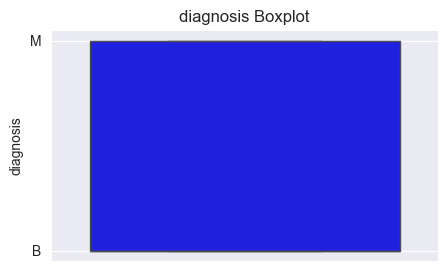

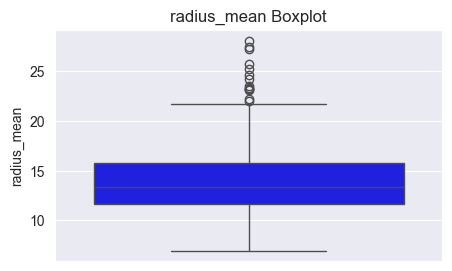

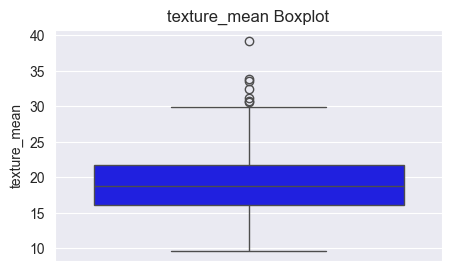

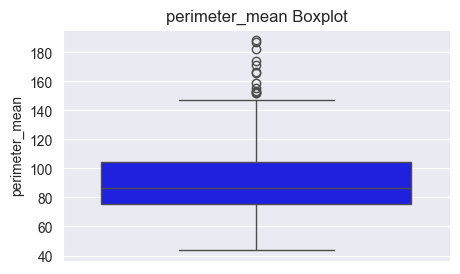

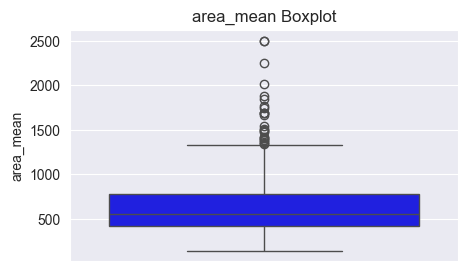

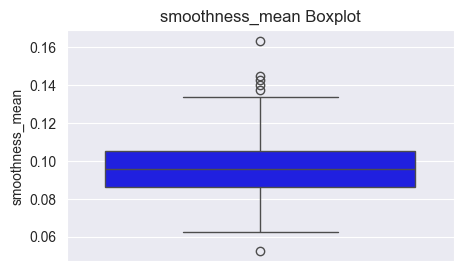

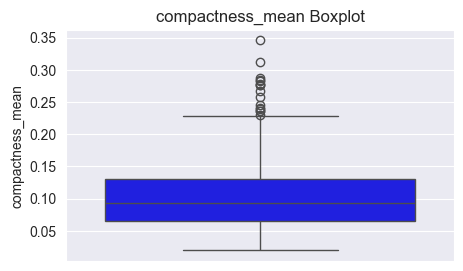

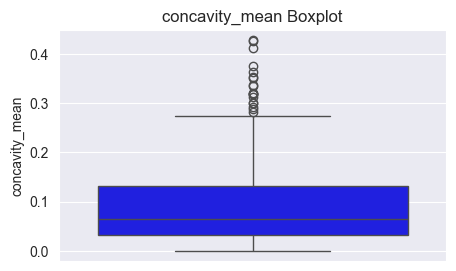

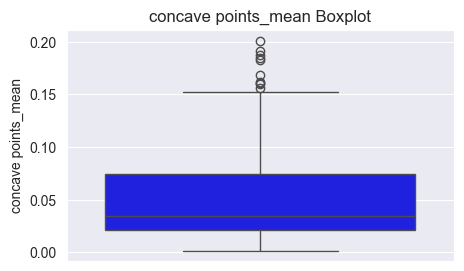

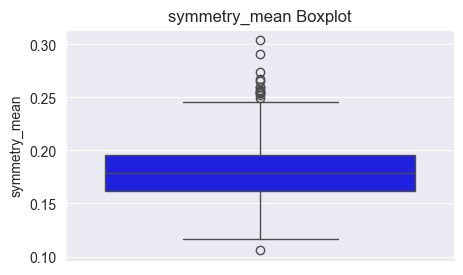

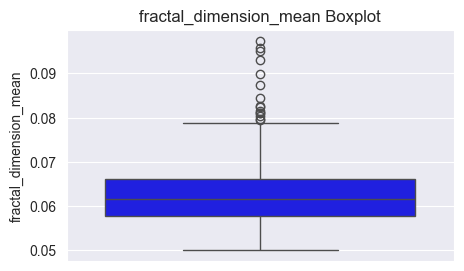

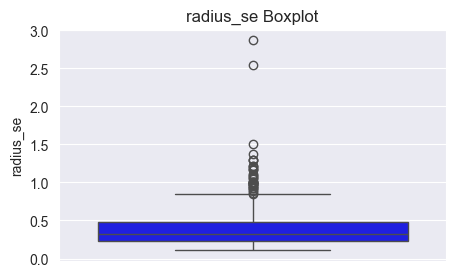

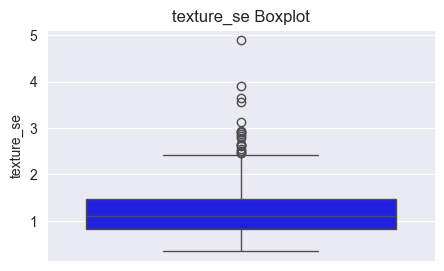

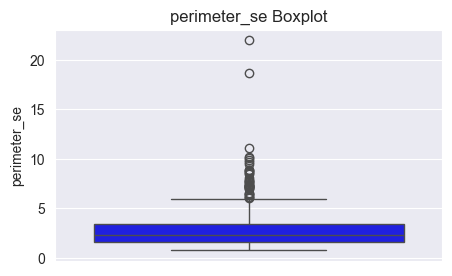

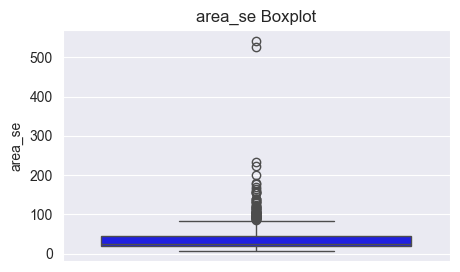

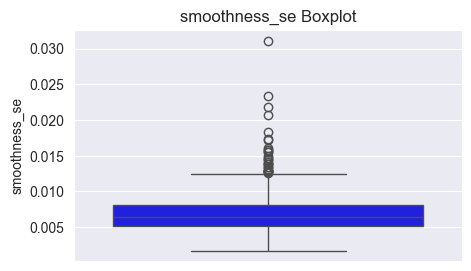

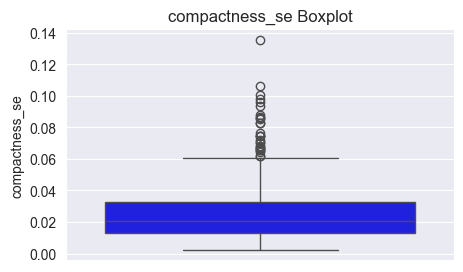

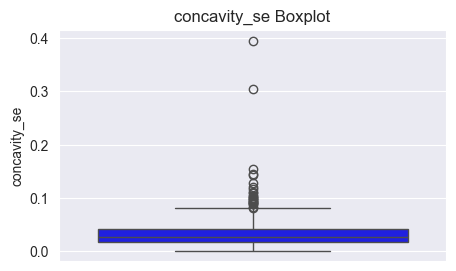

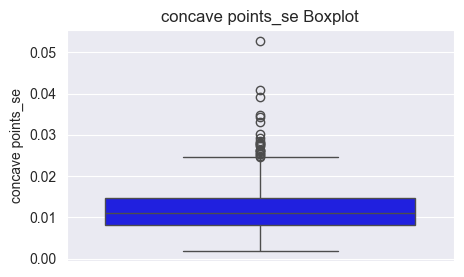

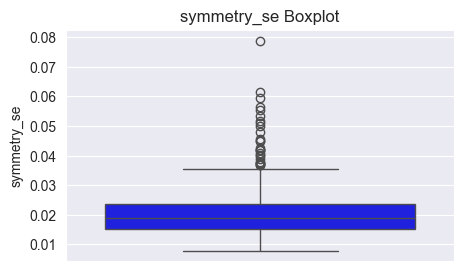

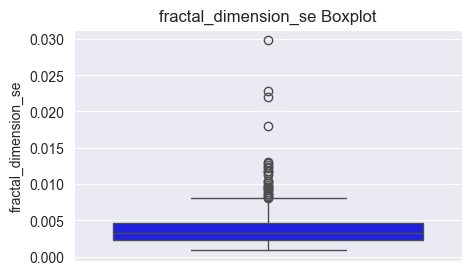

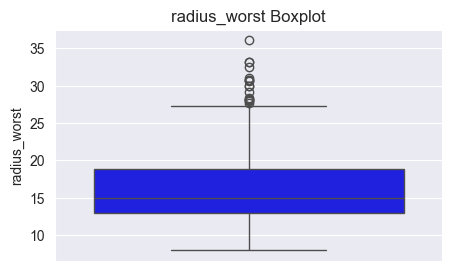

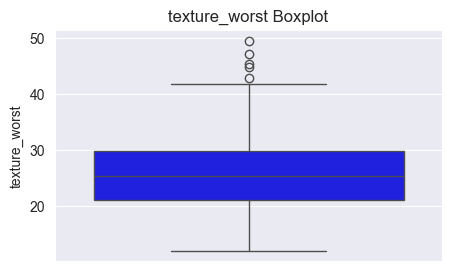

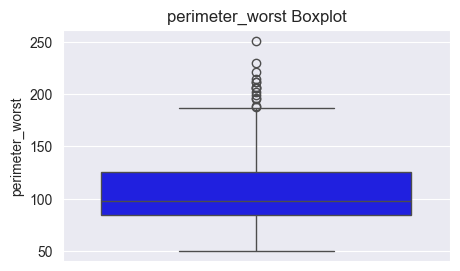

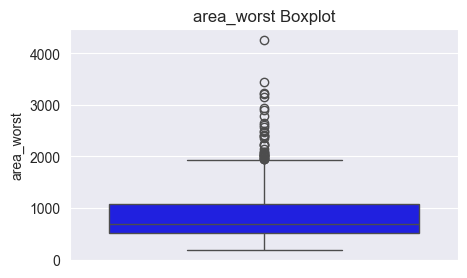

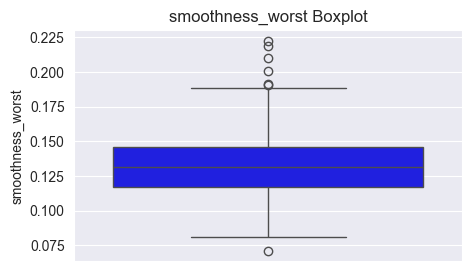

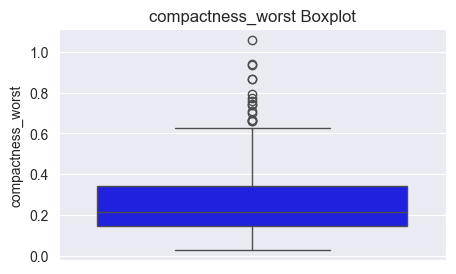

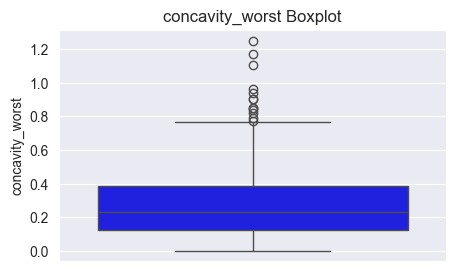

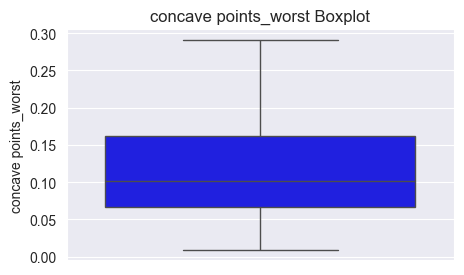

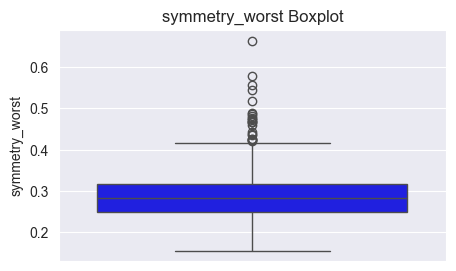

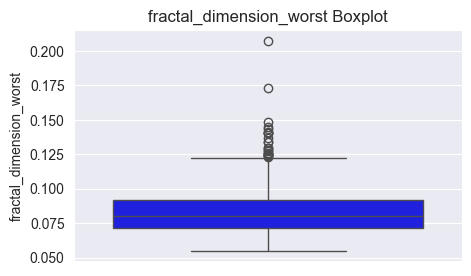

In [49]:
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col], color='blue')
    plt.title(f"{col} Boxplot")
    plt.show()

##### traitement par une méthode pour supprimer les outliers

In [50]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (
        lower_bound,
        upper_bound,
        df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        )

In [51]:
df_cleaned = df.copy()
for column in df_cleaned.select_dtypes(include=["number"]).columns:
    lower_bound, upper_bound, outliers = detect_outliers(df_cleaned, column)
    df_cleaned = df_cleaned[~df_cleaned.index.isin(outliers.index)]

df = df_cleaned


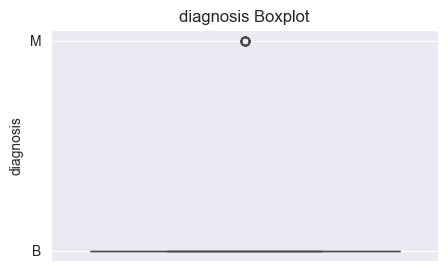

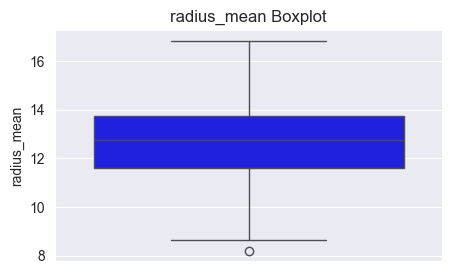

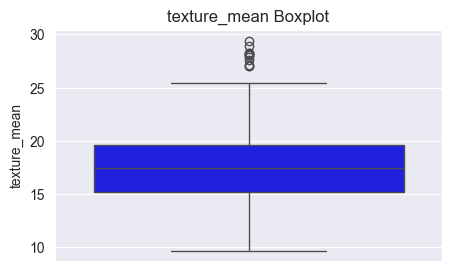

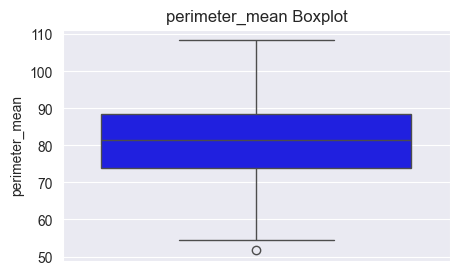

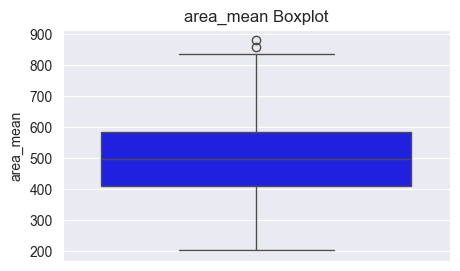

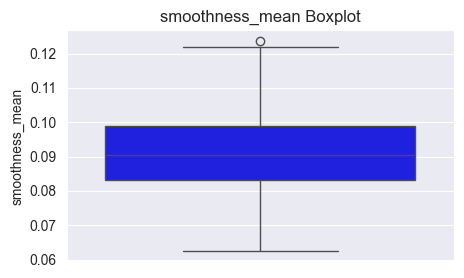

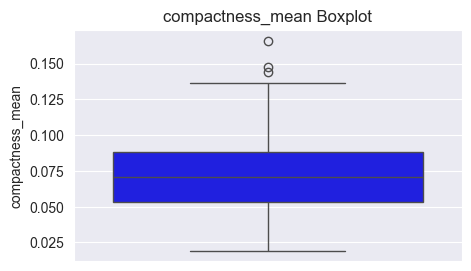

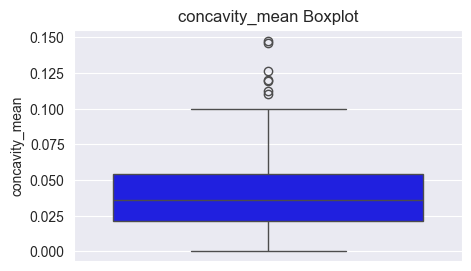

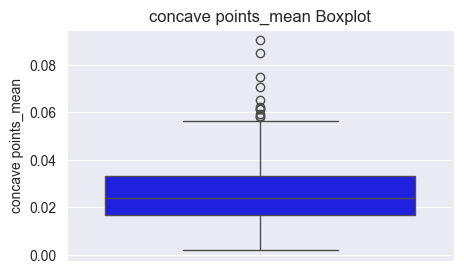

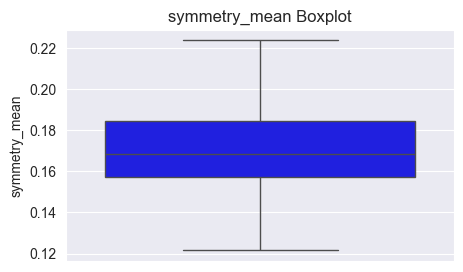

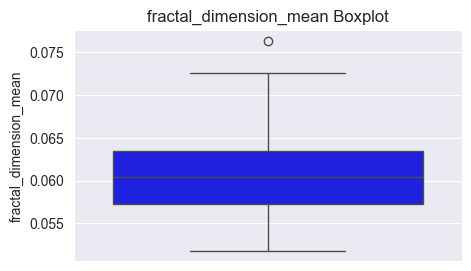

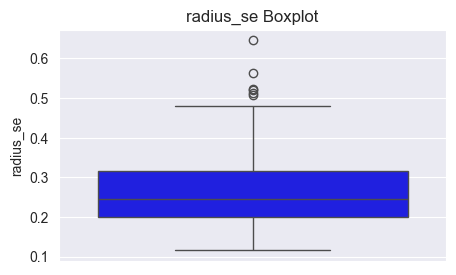

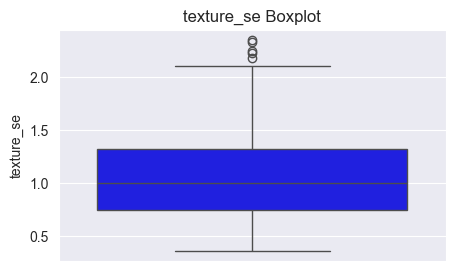

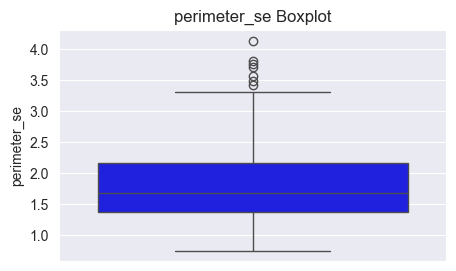

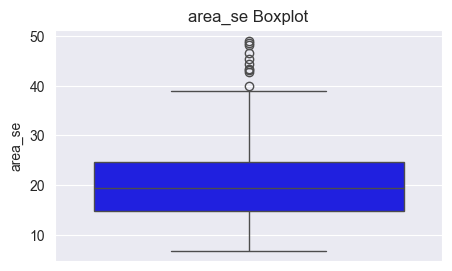

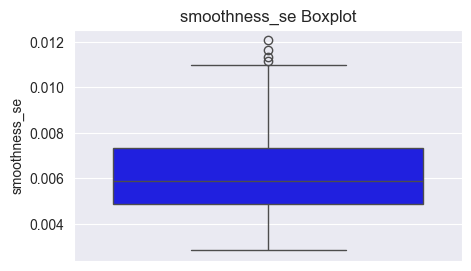

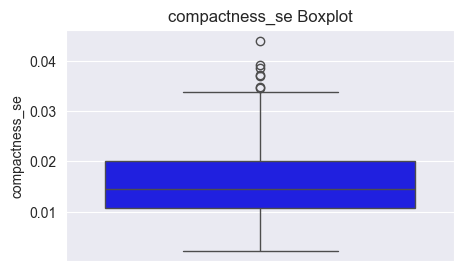

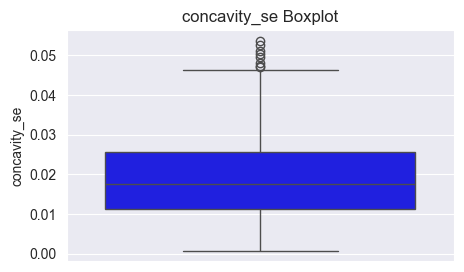

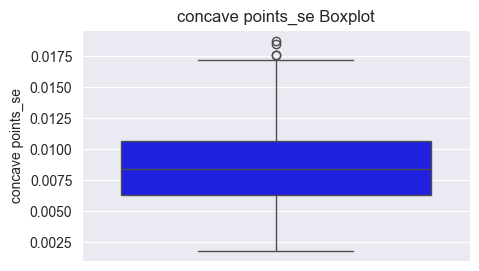

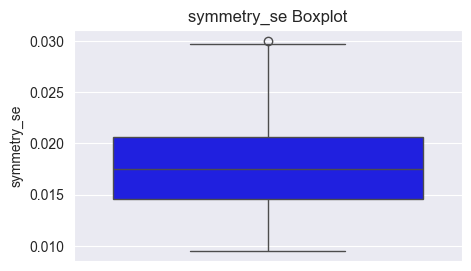

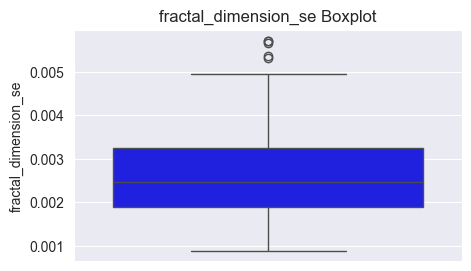

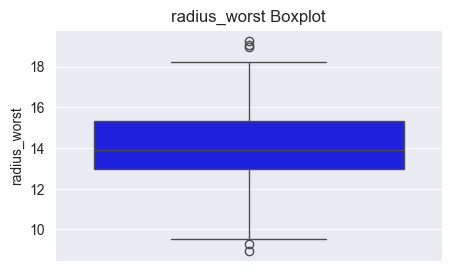

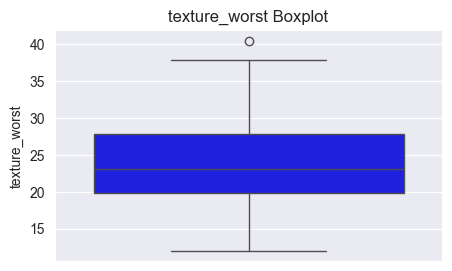

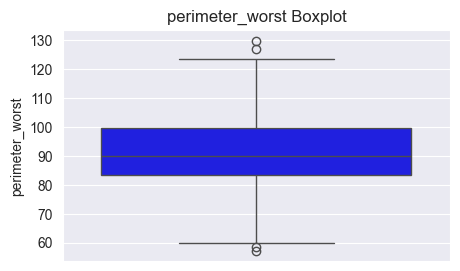

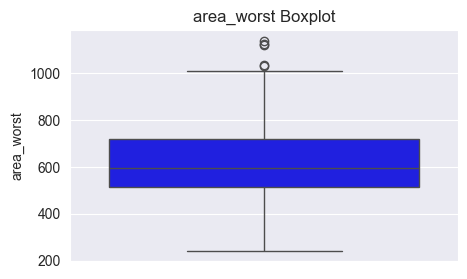

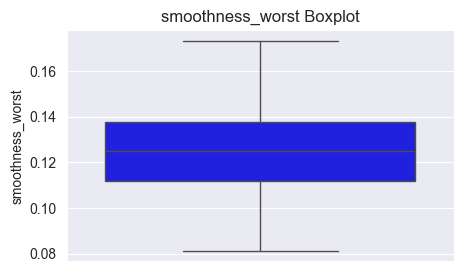

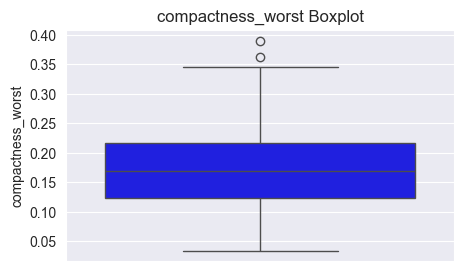

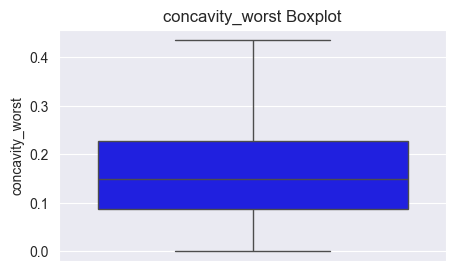

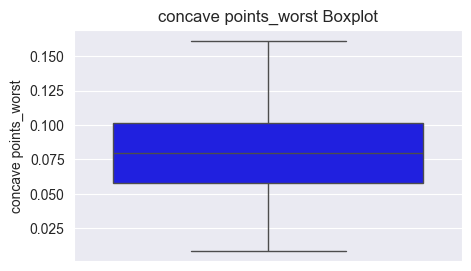

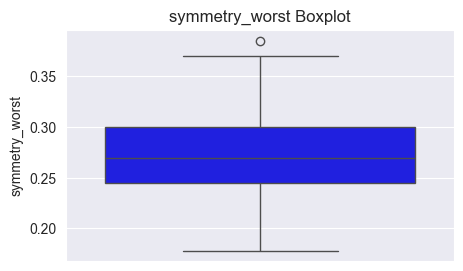

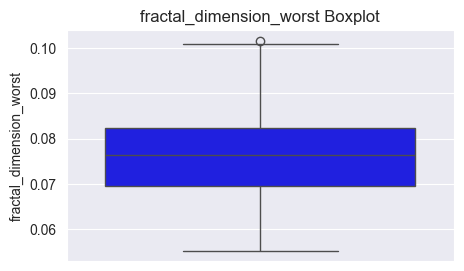

In [52]:
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col], color='blue')
    plt.title(f"{col} Boxplot")
    plt.show()

In [55]:
print(corr.head())

                 radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean         1.000000      0.094770        0.998001   0.995849   
texture_mean        0.094770      1.000000        0.097683   0.098753   
perimeter_mean      0.998001      0.097683        1.000000   0.993550   
area_mean           0.995849      0.098753        0.993550   1.000000   
smoothness_mean    -0.098035     -0.146909       -0.056019  -0.110789   

                 smoothness_mean  compactness_mean  concavity_mean  \
radius_mean            -0.098035          0.302674        0.397488   
texture_mean           -0.146909          0.052625        0.129491   
perimeter_mean         -0.056019          0.359255        0.441799   
area_mean              -0.110789          0.288578        0.406010   
smoothness_mean         1.000000          0.681514        0.396795   

                 concave points_mean  symmetry_mean  fractal_dimension_mean  \
radius_mean                 0.522469      -0.074898          

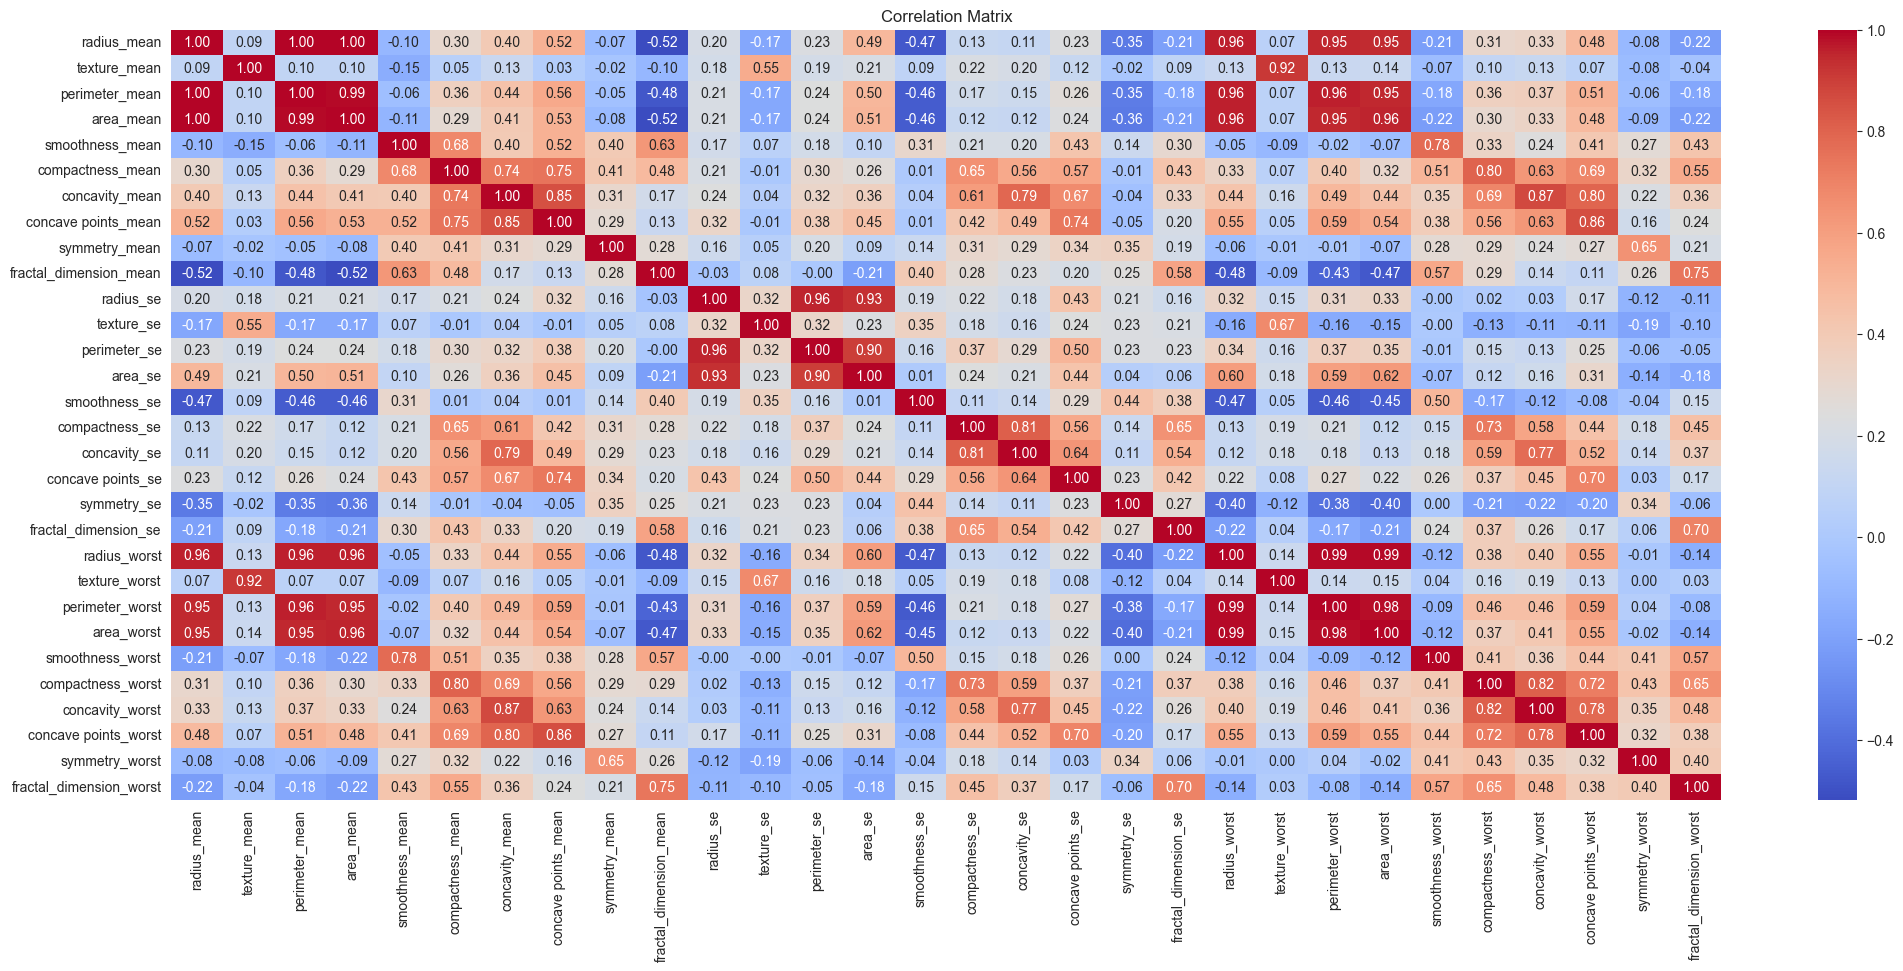

In [56]:
df = df.select_dtypes(include=["number"]).copy()

if df.empty:
    raise ValueError("Le DataFrame est vide après sélection des types numériques.")

corr = df.corr().fillna(0)

corr.columns = corr.columns.astype(str)
corr.index = corr.index.astype(str)

plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()